# Checkpoint Five: Modeling Data

With your visualizations ready to go, the final step in your project is to do some predictive analysis on your dataset. You will be using linear regression for your model. You will not be penalized if your linear regression model does not work out. You just need to build the model and make notes as to the results.

Link to my dataset:

## Prepare Your Dataframe

Import any libraries you need and create a dataframe.

In [57]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('monsters_ready.csv')

pd.set_option('display.max_column', None)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324 entries, 0 to 323
Data columns (total 39 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                324 non-null    int64  
 1   name                      324 non-null    object 
 2   size                      324 non-null    object 
 3   monster_type              324 non-null    object 
 4   alignment                 324 non-null    object 
 5   ac                        324 non-null    int64  
 6   hp                        324 non-null    int64  
 7   strength                  324 non-null    int64  
 8   dex                       324 non-null    int64  
 9   con                       324 non-null    int64  
 10  intel                     324 non-null    int64  
 11  wis                       324 non-null    int64  
 12  cha                       324 non-null    int64  
 13  senses                    324 non-null    object 
 14  languages 

## Find Correlations

Use either pairplot or a heatmap or both to find the two variables with the strongest correlation in your dataset.

In [7]:
df.describe()

,Unnamed: 0,ac,hp,strength,dex,con,intel,wis,cha,cr,str_save,dex_save,con_save,int_save,wis_save,cha_save,speed,swim,fly,climb,burrow,number_legendary_actions,history,perception,stealth,persuasion,insight,deception,arcana,religion,acrobatics,athletics,intimidation
count,324.00000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000
mean,161.50000,14.043210,81.324074,15.117284,12.651235,15.067901,7.799383,11.688272,9.746914,4.530478,0.314815,1.003086,2.006173,0.348765,1.530864,1.601852,30.570988,6.790123,20.802469,3.148148,1.589506,0.287037,0.299383,1.601852,0.685185,0.246914,0.299383,0.231481,0.259259,0.061728,0.018519,0.185185,0.015432
std,93.67497,3.245094,99.182494,6.739180,3.210658,4.495097,5.715104,2.925026,5.828096,5.864669,1.833544,2.230521,4.097114,1.760936,2.962454,3.438824,12.530998,15.203646,32.539158,9.538725,6.793369,0.908006,1.672913,3.913001,1.920952,1.631963,1.519695,1.323331,1.667595,0.877594,0.333333,1.415186,0.277778
min,0.00000,5.000000,1.000000,1.000000,1.000000,8.000000,1.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,80.75000,12.000000,18.750000,11.000000,10.000000,12.000000,2.000000,10.000000,5.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,161.50000,13.000000,45.000000,16.000000,13.000000,14.000000,7.000000,12.000000,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,242.25000,17.000000,114.000000,19.000000,15.000000,18.000000,12.000000,13.000000,14.000000,6.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,40.000000,0.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,323.00000,25.000000,676.000000,30.000000,28.000000,30.000000,25.000000,25.000000,30.000000,30.000000,17.000000,9.000000,16.000000,14.000000,14.000000,17.000000,60.000000,90.000000,150.000000,40.000000,40.000000,5.000000,13.000000,17.000000,9.000000,16.000000,10.000000,11.000000,18.000000,15.000000,6.000000,14.000000,5.000000


In [71]:
#narrowed down my most useful stats for determining a monster's power

powerful = df[['ac','hp','cr','strength','dex','intel', 'wis','number_legendary_actions','speed']]
powerful.describe()

,ac,hp,cr,strength,dex,intel,wis,number_legendary_actions,speed
count,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000
mean,14.043210,81.324074,4.530478,15.117284,12.651235,7.799383,11.688272,0.287037,30.570988
std,3.245094,99.182494,5.864669,6.739180,3.210658,5.715104,2.925026,0.908006,12.530998
min,5.000000,1.000000,0.000000,1.000000,1.000000,1.000000,3.000000,0.000000,0.000000
25%,12.000000,18.750000,0.500000,11.000000,10.000000,2.000000,10.000000,0.000000,25.000000
50%,13.000000,45.000000,2.000000,16.000000,13.000000,7.000000,12.000000,0.000000,30.000000
75%,17.000000,114.000000,6.000000,19.000000,15.000000,12.000000,13.000000,0.000000,40.000000
max,25.000000,676.000000,30.000000,30.000000,28.000000,25.000000,25.000000,5.000000,60.000000


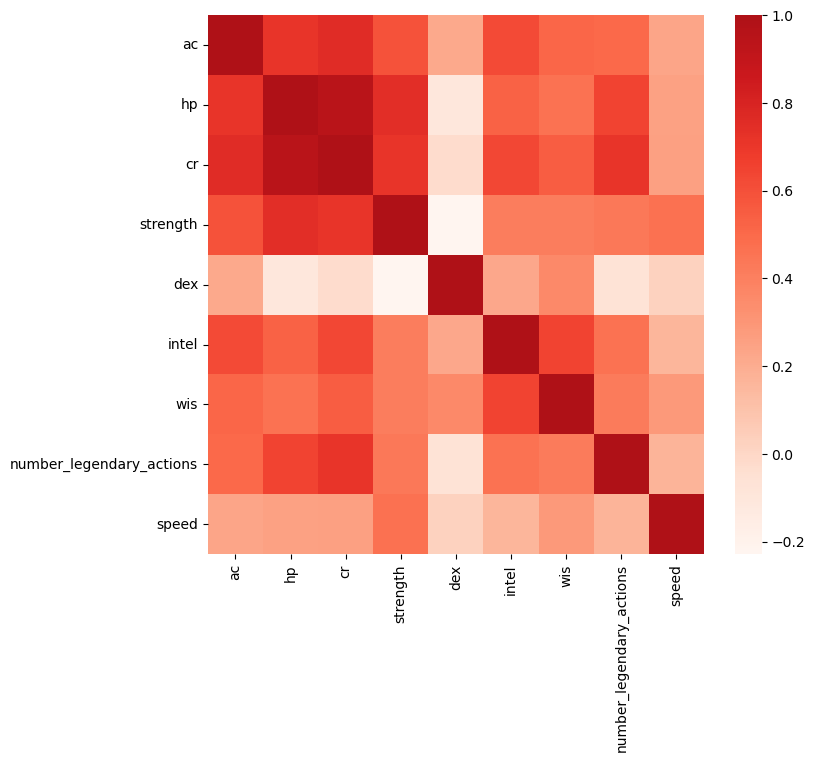

In [72]:
corr_heatmap = powerful.corr()
fig, ax = plt.subplots(figsize = (8,7))

fig = sns.heatmap(corr_heatmap, ax = ax,
                   xticklabels = corr_heatmap.columns.values,
                   yticklabels = corr_heatmap.columns.values,
                  cmap = "Reds",
                  center = 0.5
                  )

In [73]:
#Correlation values of unique pairs only

#This np.triu method retains the upper triangular values of correlation matrix and makes the lower triangular values Null
upper_corr_mat = corr_heatmap.where(np.triu(np.ones(corr_heatmap.shape), k=1).astype(bool))
  
#Converts to 1-D series and drop Null values
unique_corr_pairs = upper_corr_mat.unstack().dropna()
  
#Sort correlation pairs
sorted_mat = unique_corr_pairs.sort_values(ascending = False)
print(sorted_mat)

cr                        hp                          0.943177
                          ac                          0.755322
strength                  hp                          0.750374
                          cr                          0.720919
number_legendary_actions  cr                          0.719562
hp                        ac                          0.718168
wis                       intel                       0.654267
number_legendary_actions  hp                          0.647529
intel                     cr                          0.634867
                          ac                          0.625638
strength                  ac                          0.595058
wis                       cr                          0.548058
intel                     hp                          0.531327
wis                       ac                          0.510897
number_legendary_actions  ac                          0.503269
speed                     strength                    0

## Create Your Model

Use the two columns with the strongest correlation to create and train your model. Make sure to print out the summary and plot the column values and the line produced by the model.

## Error Terms

Finally, plot your error terms!

## Summarize Your Work

Make notes of your answers to the questions below.

1. What was your R-squared value? 0.638
2. Based on your results, do you think a linear regression model was the best type of predictive analysis for your dataset? It was not particularly effective in this case.
3. Was your plot of the error terms a bell curve? Not really